In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from datetime import datetime
from sklearn.model_selection import train_test_split
drive.mount('/content/gdrive')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


#Reading the data sets - shelter data set and Weather data set

In [0]:
sdf= pd.read_csv('/content/gdrive/My Drive/daily-shelter-occupancy-2019-csv.csv')
sdf.head(5)

In [0]:
# wdf=pd.read_csv('/content/gdrive/My Drive/en_climate_daily_ON_615S001_2019_P1D.csv')
# wdf=pd.read_excel('enclimatedailyON615S0012019P1D.xlsx')
# wdf.head(5)

# We already joined the shelter and Weather data frame with SQL query and our final data set is FinalTable.csv

In [0]:
df=pd.read_csv('/content/gdrive/My Drive/FinalTable.csv')
df.head(5)

,_id,OCCUPANCY_DATE,Existing Shelters In Area,Max Temp (°C),Min Temp (°C),ORGANIZATION_NAME,SHELTER_NAME,SHELTER_ADDRESS,SHELTER_CITY,SHELTER_PROVINCE,SHELTER_POSTAL_CODE,FACILITY_NAME,PROGRAM_NAME,SECTOR,OCCUPANCY,CAPACITY
0,30,2019-01-01T00:00:00,4,0.5,-3.0,City of Toronto,Streets To Homes,129 Peter St,Toronto,ON,M5V 1X1,129 Peter St,Streets to Homes Bedded Program,Co-ed,32,40.0
1,134,2019-01-02T00:00:00,4,0.0,-11.0,City of Toronto,Streets To Homes,129 Peter St,Toronto,ON,M5V 1X1,129 Peter St,Streets to Homes Bedded Program,Co-ed,37,40.0
2,238,2019-01-03T00:00:00,4,2.0,-4.5,City of Toronto,Streets To Homes,129 Peter St,Toronto,ON,M5V 1X1,129 Peter St,Streets to Homes Bedded Program,Co-ed,34,40.0
3,342,2019-01-04T00:00:00,4,8.0,-0.5,City of Toronto,Streets To Homes,129 Peter St,Toronto,ON,M5V 1X1,129 Peter St,Streets to Homes Bedded Program,Co-ed,33,40.0
4,446,2019-01-05T00:00:00,4,4.0,-3.0,City of Toronto,Streets To Homes,129 Peter St,Toronto,ON,M5V 1X1,129 Peter St,Streets to Homes Bedded Program,Co-ed,33,40.0


#Understanding the data

In [0]:
df.isnull().sum()

_id                           0
OCCUPANCY_DATE                0
Existing Shelters In Area     0
Max Temp (°C)                 0
Min Temp (°C)                 0
ORGANIZATION_NAME             0
SHELTER_NAME                  0
SHELTER_ADDRESS               0
SHELTER_CITY                  0
SHELTER_PROVINCE              0
SHELTER_POSTAL_CODE           0
FACILITY_NAME                 0
PROGRAM_NAME                  0
SECTOR                        0
OCCUPANCY                     0
CAPACITY                     43
dtype: int64

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38616 entries, 0 to 38615
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   _id                        38616 non-null  int64  
 1   OCCUPANCY_DATE             38616 non-null  object 
 2   Existing Shelters In Area  38616 non-null  int64  
 3   Max Temp (°C)              38616 non-null  float64
 4   Min Temp (°C)              38616 non-null  float64
 5   ORGANIZATION_NAME          38616 non-null  object 
 6   SHELTER_NAME               38616 non-null  object 
 7   SHELTER_ADDRESS            38616 non-null  object 
 8   SHELTER_CITY               38616 non-null  object 
 9   SHELTER_PROVINCE           38616 non-null  object 
 10  SHELTER_POSTAL_CODE        38616 non-null  object 
 11  FACILITY_NAME              38616 non-null  object 
 12  PROGRAM_NAME               38616 non-null  object 
 13  SECTOR                     38616 non-null  obj

In [0]:
df.describe()

,_id,Existing Shelters In Area,Max Temp (°C),Min Temp (°C),OCCUPANCY,CAPACITY
count,38616.000000,38616.000000,38616.000000,38616.000000,38616.000000,38573.000000
mean,19547.646364,3.485291,12.761355,3.157797,63.942848,67.698960
std,11379.745226,3.717270,11.608516,10.189957,100.374195,112.236508
min,1.000000,1.000000,-16.000000,-23.000000,0.000000,0.000000
25%,9676.750000,1.000000,3.000000,-4.000000,17.000000,18.000000
50%,19463.500000,2.000000,12.500000,3.500000,40.000000,40.000000
75%,29394.250000,3.000000,23.500000,12.000000,71.000000,74.000000
max,39444.000000,13.000000,34.000000,23.500000,826.000000,902.000000


# Analysing and visualizing the data

 Correlation between SECTOR and ACCUPANCY, it is clear that shelters were more contain Families 

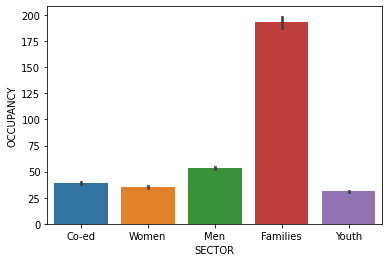

In [0]:
sns.barplot(x='SECTOR',y='OCCUPANCY',data=df)

Plot pairwise relationships in a dataset.

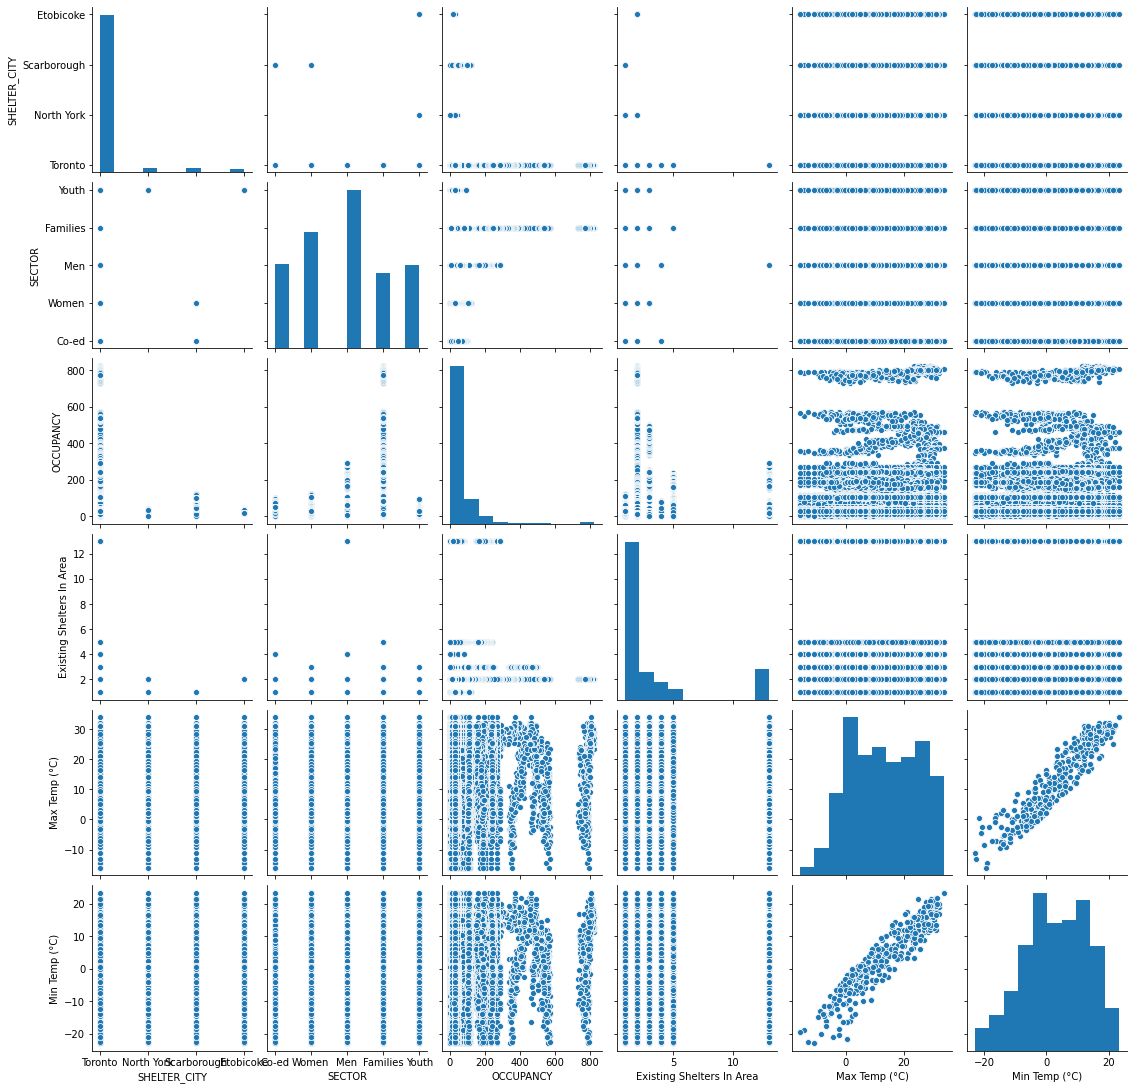

In [0]:
sns.pairplot(df ,vars=['SHELTER_CITY','SECTOR','OCCUPANCY','Existing Shelters In Area','Max Temp (°C)','Min Temp (°C)'])

# Plot heatmap to see the correlation beween OCCUPANCY and Day of Month

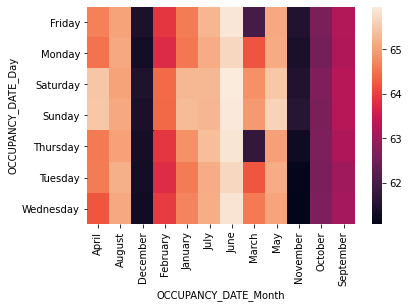

In [0]:
pvOccupancy = new_df.pivot_table(values='OCCUPANCY', index='OCCUPANCY_DATE_Day',columns ='OCCUPANCY_DATE_Month')
sns.heatmap(pvOccupancy)

# Convert date to YEAR,MONTH ,DAY

In [0]:
new_df=df.copy()
new_df['OCCUPANCY_DATE']=pd.to_datetime(new_df['OCCUPANCY_DATE'])
new_df['OCCUPANCY_DATE_year']= new_df['OCCUPANCY_DATE'].map(lambda x: x.strftime('%Y'))
new_df['OCCUPANCY_DATE_Month']=new_df['OCCUPANCY_DATE'].map(lambda x:x.strftime('%B'))
new_df['OCCUPANCY_DATE_Day']=new_df['OCCUPANCY_DATE'].map(lambda x:x.strftime('%A'))

# DROP unnecessarly attributes

In [0]:
new_df.drop(['_id','FACILITY_NAME','SHELTER_POSTAL_CODE','ORGANIZATION_NAME','SHELTER_ADDRESS','SHELTER_PROVINCE','SHELTER_NAME','OCCUPANCY_DATE','OCCUPANCY_DATE_year','PROGRAM_NAME','OCCUPANCY_DATE_Day','SHELTER_CITY'],axis=1,inplace=True)
new_df['Vacancies']=new_df['CAPACITY']-new_df['OCCUPANCY']


In [0]:
new_df.drop(['OCCUPANCY'],axis=1,inplace=True)

In [0]:
new_df

,Existing Shelters In Area,Max Temp (°C),Min Temp (°C),SECTOR,CAPACITY,OCCUPANCY_DATE_Month,Vacancies
0,4,0.5,-3.0,Co-ed,40.0,January,8.0
1,4,0.0,-11.0,Co-ed,40.0,January,3.0
2,4,2.0,-4.5,Co-ed,40.0,January,6.0
3,4,8.0,-0.5,Co-ed,40.0,January,7.0
4,4,4.0,-3.0,Co-ed,40.0,January,7.0
...,...,...,...,...,...,...,...
38611,1,10.0,1.0,Youth,31.0,December,1.0
38612,1,5.0,1.0,Youth,31.0,December,0.0
38613,1,2.0,0.0,Youth,31.0,December,1.0
38614,1,9.5,0.5,Youth,31.0,December,0.0


#Discover outliers with visualization tools

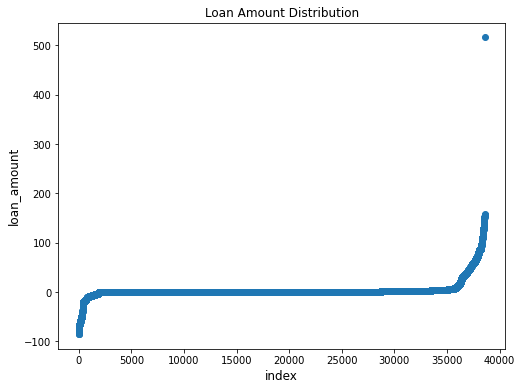

In [0]:
plt.figure(figsize=(8,6))
plt.scatter(range(new_df.shape[0]), np.sort(new_df.Vacancies.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('loan_amount', fontsize=12)
plt.title("Loan Amount Distribution")
plt.show()

#Identifying Outliers with Interquartile Range (IQR), Boc plot and Hist plot

The interquartile range (IQR) is a measure of statistical dispersion and is calculated as the difference between the 75th and 25th percentiles. It is represented by the formula IQR = Q3 − Q1. The lines of code below calculate and print the interquartile range for each of the variables in the dataset.

In [0]:
Q1 = new_df.quantile(0.25)
Q3 = new_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Existing Shelters In Area     2.0
Max Temp (°C)                20.5
Min Temp (°C)                16.0
CAPACITY                     56.0
Vacancies                     2.0
dtype: float64


The above output prints the IQR scores, which can be used to detect outliers.

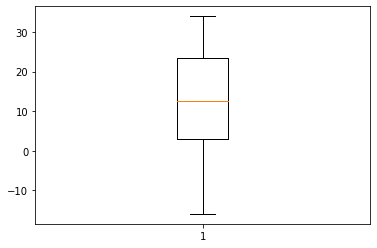

In [0]:
plt.boxplot(new_df["Max Temp (°C)"])
plt.show()

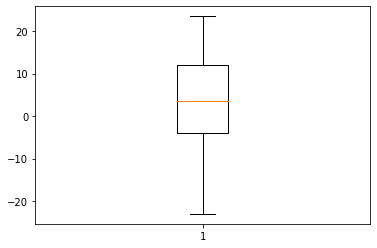

In [0]:
plt.boxplot(new_df["Min Temp (°C)"])
plt.show()

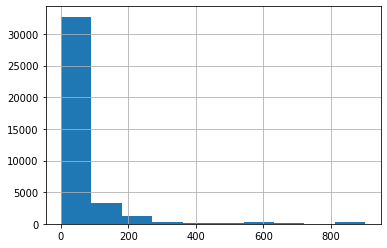

In [0]:
new_df.CAPACITY.hist()

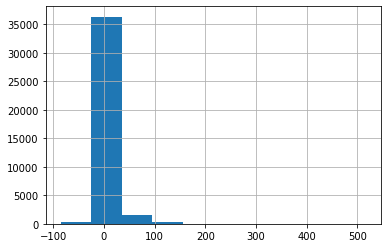

In [0]:
new_df.Vacancies.hist()

#Deal with outliers - **Log transformation**

In [0]:
new_df["CAPACITY"] = new_df["CAPACITY"].map(lambda i: np.log(i) if i > 0 else 0) 
new_df["Vacancies"] = new_df["Vacancies"].map(lambda i: np.log(i) if i > 0 else 0)
new_df["Min Temp (°C)"] = new_df["Min Temp (°C)"].map(lambda i: np.log(i) if i > 0 else 0)
new_df["Max Temp (°C)"] = new_df["Max Temp (°C)"].map(lambda i: np.log(i) if i > 0 else 0)

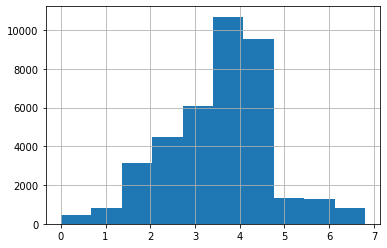

In [0]:
new_df.CAPACITY.hist()

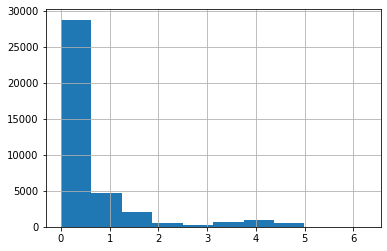

In [0]:
new_df.Vacancies.hist()

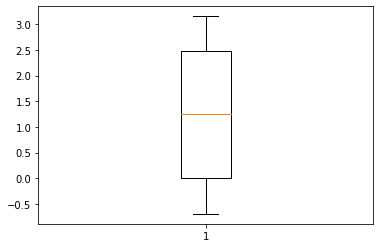

In [0]:
plt.boxplot(new_df["Min Temp (°C)"])
plt.show()

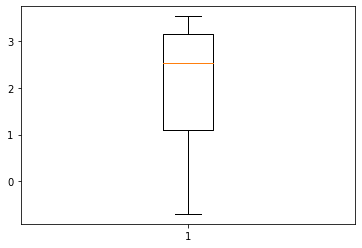

In [0]:
plt.boxplot(new_df["Max Temp (°C)"])
plt.show()

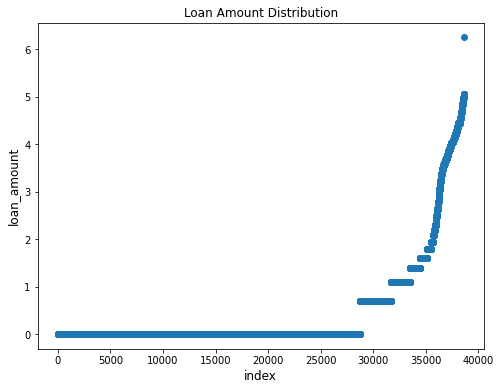

In [0]:
plt.figure(figsize=(8,6))
plt.scatter(range(new_df.shape[0]), np.sort(new_df.Vacancies.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('loan_amount', fontsize=12)
plt.title("Loan Amount Distribution")
plt.show()

In [0]:
Q1 = new_df.quantile(0.25)
Q3 = new_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Existing Shelters In Area    2.000000
Max Temp (°C)                2.058388
Min Temp (°C)                2.484907
CAPACITY                     1.413693
Vacancies                    0.693147
dtype: float64


In [0]:
new_df.describe()

,Existing Shelters In Area,Max Temp (°C),Min Temp (°C),CAPACITY,Vacancies
count,38616.000000,38616.000000,38616.000000,38616.000000,38616.000000
mean,3.485291,2.056158,1.206017,3.533598,0.472784
std,3.717270,1.268643,1.218108,1.205422,1.042297
min,1.000000,-0.693147,-0.693147,0.000000,0.000000
25%,1.000000,1.098612,0.000000,2.890372,0.000000
50%,2.000000,2.525729,1.252763,3.688879,0.000000
75%,3.000000,3.157000,2.484907,4.304065,0.693147
max,13.000000,3.526361,3.157000,6.804615,6.246107


# Creat Dummy variables of Categorical variables

In [0]:

categorical_features = new_df.select_dtypes("object").columns.to_list()
categorical_features

['SECTOR', 'OCCUPANCY_DATE_Month']

In [0]:
df_with_dummies = pd.get_dummies( new_df, columns = categorical_features)

In [0]:
df_with_dummies

,Existing Shelters In Area,Max Temp (°C),Min Temp (°C),CAPACITY,Vacancies,SECTOR_Co-ed,SECTOR_Families,SECTOR_Men,SECTOR_Women,SECTOR_Youth,OCCUPANCY_DATE_Month_April,OCCUPANCY_DATE_Month_August,OCCUPANCY_DATE_Month_December,OCCUPANCY_DATE_Month_February,OCCUPANCY_DATE_Month_January,OCCUPANCY_DATE_Month_July,OCCUPANCY_DATE_Month_June,OCCUPANCY_DATE_Month_March,OCCUPANCY_DATE_Month_May,OCCUPANCY_DATE_Month_November,OCCUPANCY_DATE_Month_October,OCCUPANCY_DATE_Month_September
0,4,-0.693147,0.000000,3.688879,2.079442,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,4,0.000000,0.000000,3.688879,1.098612,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,4,0.693147,0.000000,3.688879,1.791759,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,4,2.079442,0.000000,3.688879,1.945910,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,4,1.386294,0.000000,3.688879,1.945910,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38611,1,2.302585,0.000000,3.433987,0.000000,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
38612,1,1.609438,0.000000,3.433987,0.000000,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
38613,1,0.693147,0.000000,3.433987,0.000000,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
38614,1,2.251292,-0.693147,3.433987,0.000000,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


In [0]:
df_with_dummies.dropna(inplace=True)
df_with_dummies.isnull().sum()

Existing Shelters In Area         0
Max Temp (°C)                     0
Min Temp (°C)                     0
CAPACITY                          0
Vacancies                         0
SECTOR_Co-ed                      0
SECTOR_Families                   0
SECTOR_Men                        0
SECTOR_Women                      0
SECTOR_Youth                      0
OCCUPANCY_DATE_Month_April        0
OCCUPANCY_DATE_Month_August       0
OCCUPANCY_DATE_Month_December     0
OCCUPANCY_DATE_Month_February     0
OCCUPANCY_DATE_Month_January      0
OCCUPANCY_DATE_Month_July         0
OCCUPANCY_DATE_Month_June         0
OCCUPANCY_DATE_Month_March        0
OCCUPANCY_DATE_Month_May          0
OCCUPANCY_DATE_Month_November     0
OCCUPANCY_DATE_Month_October      0
OCCUPANCY_DATE_Month_September    0
dtype: int64

# Create Train and Test set

In [0]:
X=df_with_dummies.drop('Vacancies',axis=1)
y=df_with_dummies['Vacancies']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state=42)

In [0]:
X_train.shape

(30892, 21)

In [0]:
y_train.shape

(30892,)

In [0]:
X_test.shape

(7724, 21)

In [0]:
y_test.shape

(7724,)

# Scale the attributes with MinMax Scaler

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

In [0]:
X_train

array([[0.08333333, 0.85576758, 0.46537423, ..., 0.        , 0.        ,
        0.        ],
       [0.08333333, 0.94971581, 0.90015663, ..., 0.        , 0.        ,
        0.        ],
       [0.08333333, 0.56828792, 0.18003133, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.84259784, 0.80283739, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.7980305 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.08333333, 0.88580704, 0.80283739, ..., 0.        , 0.        ,
        0.        ]])

In [0]:
y_train

34453    4.442651
7831     0.000000
23182    0.000000
19205    0.000000
11034    0.000000
           ...   
6265     0.000000
11284    0.000000
38158    0.000000
860      0.000000
15795    0.000000
Name: Vacancies, Length: 30892, dtype: float64

# Linear Regressor , Decision Tree Regressor, RandomForest Regressor,Ridge regression, LASSO Regressor, SVR and Voting Classifier

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

create a instance of each model

In [0]:
lr = LinearRegression()
dt = DecisionTreeRegressor(criterion="mse",random_state=42)
svr = SVR()
ridge_reg =Ridge(alpha=1, solver="cholesky")
lasso_reg = Lasso(alpha=0.1)
forest_reg = RandomForestRegressor()
params = [
          {'n_estimators': [10,20,30,40], 'bootstrap':[True], "max_features":["auto"]}
]
grid_search = GridSearchCV( forest_reg, params,scoring ="neg_mean_squared_error",cv=10,n_jobs = -1)


# fit the grid search for random forest regressor

In [0]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_j

In [0]:
grid_search.best_params_

{'bootstrap': True, 'max_features': 'auto', 'n_estimators': 30}

In [0]:
curve = grid_search.cv_results_
for mean_sqr, params in zip(curve["mean_test_score"], curve["params"]):
    print (np.sqrt(-mean_sqr), params)

0.38635784032728576 {'bootstrap': True, 'max_features': 'auto', 'n_estimators': 10}
0.3824263792442377 {'bootstrap': True, 'max_features': 'auto', 'n_estimators': 20}
0.38230356444506153 {'bootstrap': True, 'max_features': 'auto', 'n_estimators': 30}
0.38001069565879975 {'bootstrap': True, 'max_features': 'auto', 'n_estimators': 40}


# Train the data set with each defined regressor model

In [0]:
voting_r = VotingRegressor( estimators = [('ln_r', lr),('sv_r',svr),('dt_r',dt),('ridge_r',ridge_reg),('lasso_r',lasso_reg),('rf_r', grid_search.best_estimator_)])
rf=grid_search.best_estimator_
for r in (lr,svr, dt,rf,ridge_reg,lasso_reg, voting_r):
  cross_score = cross_val_score(r, X_train,y_train, scoring ="neg_mean_squared_error", cv=10)
  rmse = np.sqrt(-cross_score)
  print (r.__class__.__name__)
  print ("Mean:\t\t", rmse.mean(), "\nStandard Deviation:", rmse.std(), "\n")

LinearRegression
Mean:		 0.827956996390603 
Standard Deviation: 0.012148128725847508 

SVR
Mean:		 0.683354887757316 
Standard Deviation: 0.013404555297753485 

DecisionTreeRegressor
Mean:		 0.451456180944845 
Standard Deviation: 0.012035475784329439 

RandomForestRegressor
Mean:		 0.3805916769594946 
Standard Deviation: 0.01343748857583115 

Ridge
Mean:		 0.8276173926402937 
Standard Deviation: 0.011984321048719403 

Lasso
Mean:		 0.9232264774496569 
Standard Deviation: 0.022888705124693032 

VotingRegressor
Mean:		 0.5770097187238237 
Standard Deviation: 0.011936021883586808 



#It is clear that Random Forest Regressor performs better so our final MODEL for training the TEST SET is Random Forest Regressor

In [0]:
final_model = grid_search.best_estimator_
y_predicted = final_model.predict(X_train)


In [0]:
y_predicted [1:7]


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       4.85843804])

In [0]:
y_train[1:7]

7831     0.00000
23182    0.00000
19205    0.00000
11034    0.00000
11667    0.00000
5252     4.85203
Name: Vacancies, dtype: float64

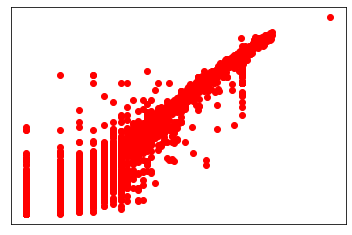

In [0]:
# Plot outputs
import matplotlib.pyplot as plt

plt.scatter(y_train, y_predicted, color = 'red')
plt.xticks(())
plt.yticks(())
plt.show()

Evaluate the model after prediction

In [0]:
from sklearn.metrics import mean_squared_error
training_mse = mean_squared_error(y_predicted,y_train)
print("Training MSE:\t\t", training_mse, "\n")

Training MSE:		 0.045151512296599514 



#EVALUATING THE MODEL ON TEST SET

In [0]:
X_test =scaler.transform(X_test)

In [0]:
X_test[1:7]

array([[0.16666667, 0.16427205, 0.18003133, 0.89044327, 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.18003133, 0.36517964, 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.08333333, 0.16427205, 0.18003133, 0.99770115, 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.25      , 0.89138363, 0.59805112, 0.63252152, 0.        ,
        0.        , 1.        , 0.        , 0.       

In [0]:
y_test_predicted = final_model.predict(X_test)

In [0]:
test_mse = mean_squared_error(y_test_predicted ,y_test)
print("Test MSE:\t\t", test_mse, "\n")

Test MSE:		 0.14864138319239828 



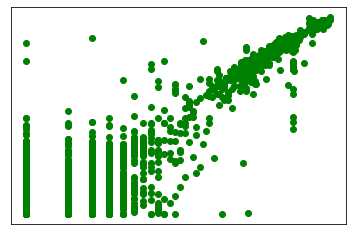

In [0]:
plt.scatter(y_test, y_test_predicted, color = 'green')
plt.xticks(())
plt.yticks(())
plt.show()

In [0]:
y_test[1:7]

2323     4.418841
8879     0.000000
5503     4.919981
14324    0.000000
18501    0.000000
16675    0.000000
Name: Vacancies, dtype: float64

# CREATING A PIPELINE

In [0]:
from sklearn.pipeline import Pipeline
full_pipeline = Pipeline([
                          ('minmax_scaler',MinMaxScaler()),
                          
])

In [0]:
X_train_prepard = full_pipeline.fit_transform(X_train)

In [0]:
X_train_prepard

array([[0.08333333, 0.85576758, 0.46537423, ..., 0.        , 0.        ,
        0.        ],
       [0.08333333, 0.94971581, 0.90015663, ..., 0.        , 0.        ,
        0.        ],
       [0.08333333, 0.56828792, 0.18003133, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.84259784, 0.80283739, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.7980305 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.08333333, 0.88580704, 0.80283739, ..., 0.        , 0.        ,
        0.        ]])

# Predict on the prepared data

In [0]:
X_train_predict = final_model.predict(X_train_prepard)

In [0]:
X_train_predict

array([4.24950925, 0.        , 0.        , ..., 0.        , 0.57650739,
       0.        ])

#Evaluate the model (with Pipeline) on the Test set

In [0]:
X_test_prepard = full_pipeline.transform(X_test)

In [0]:
X_test_prepard

array([[0.08333333, 0.90736685, 0.88339402, ..., 0.        , 0.        ,
        0.        ],
       [0.16666667, 0.16427205, 0.18003133, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.18003133, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.08333333, 0.89683202, 0.77808245, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.96635383, 0.91590268, ..., 0.        , 0.        ,
        1.        ],
       [0.08333333, 0.16427205, 0.18003133, ..., 0.        , 0.        ,
        0.        ]])

# Predict on the prepared data

In [0]:
X_test_predict = final_model.predict(X_test_prepard)

In [0]:
y_test [1:9]

2323     4.418841
8879     0.000000
5503     4.919981
14324    0.000000
18501    0.000000
16675    0.000000
23228    0.000000
7880     0.000000
Name: Vacancies, dtype: float64

In [0]:
X_test_predict[1:9]

array([4.36993993, 0.        , 4.87507805, 0.90939524, 0.02746531,
       0.        , 0.        , 0.        ])

# Calculate MSE on the Train and Test set


In [0]:

from sklearn.metrics import mean_squared_error
pip_train_mse = mean_squared_error(X_train_predict ,y_train)
print("Train MSE:\t\t", pip_train_mse, "\n")



pip_test_mse = mean_squared_error(X_test_predict,y_test)
print("Test MSE:\t\t", pip_test_mse, "\n")

Train MSE:		 0.04550382348285139 

Test MSE:		 0.1495930615359302 

